In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer,StandardScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loding data from csv file
df=pd.read_csv('/content/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
df['Date'].unique()

array(['2015-12-27', '2015-12-20', '2015-12-13', '2015-12-06',
       '2015-11-29', '2015-11-22', '2015-11-15', '2015-11-08',
       '2015-11-01', '2015-10-25', '2015-10-18', '2015-10-11',
       '2015-10-04', '2015-09-27', '2015-09-20', '2015-09-13',
       '2015-09-06', '2015-08-30', '2015-08-23', '2015-08-16',
       '2015-08-09', '2015-08-02', '2015-07-26', '2015-07-19',
       '2015-07-12', '2015-07-05', '2015-06-28', '2015-06-21',
       '2015-06-14', '2015-06-07', '2015-05-31', '2015-05-24',
       '2015-05-17', '2015-05-10', '2015-05-03', '2015-04-26',
       '2015-04-19', '2015-04-12', '2015-04-05', '2015-03-29',
       '2015-03-22', '2015-03-15', '2015-03-08', '2015-03-01',
       '2015-02-22', '2015-02-15', '2015-02-08', '2015-02-01',
       '2015-01-25', '2015-01-18', '2015-01-11', '2015-01-04',
       '2016-12-25', '2016-12-18', '2016-12-11', '2016-12-04',
       '2016-11-27', '2016-11-20', '2016-11-13', '2016-11-06',
       '2016-10-30', '2016-10-23', '2016-10-16', '2016-

In [6]:
cat_f=['type','year','region']

In [ ]:
#check metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
3#check null
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
#check categorical values in categorical columns
cat_f=['region','type','year']
for i in cat_f:
    print('\n','-'*15,i,'-'*15)
    print(df[i].value_counts())


 --------------- region ---------------
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte     

In [ ]:
#drop unnecessary column
df.drop(columns=['Unnamed: 0','Date'],axis=1,inplace=True)

In [ ]:
#check statistical distribution
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Data is right skewed  
Data has outliers

In [4]:
#listing continuos features
conti_f=[]
for i in df.columns:
    if df[i].dtype=='object':
        continue
    else:
        conti_f.append(i)
conti_f.remove('year')

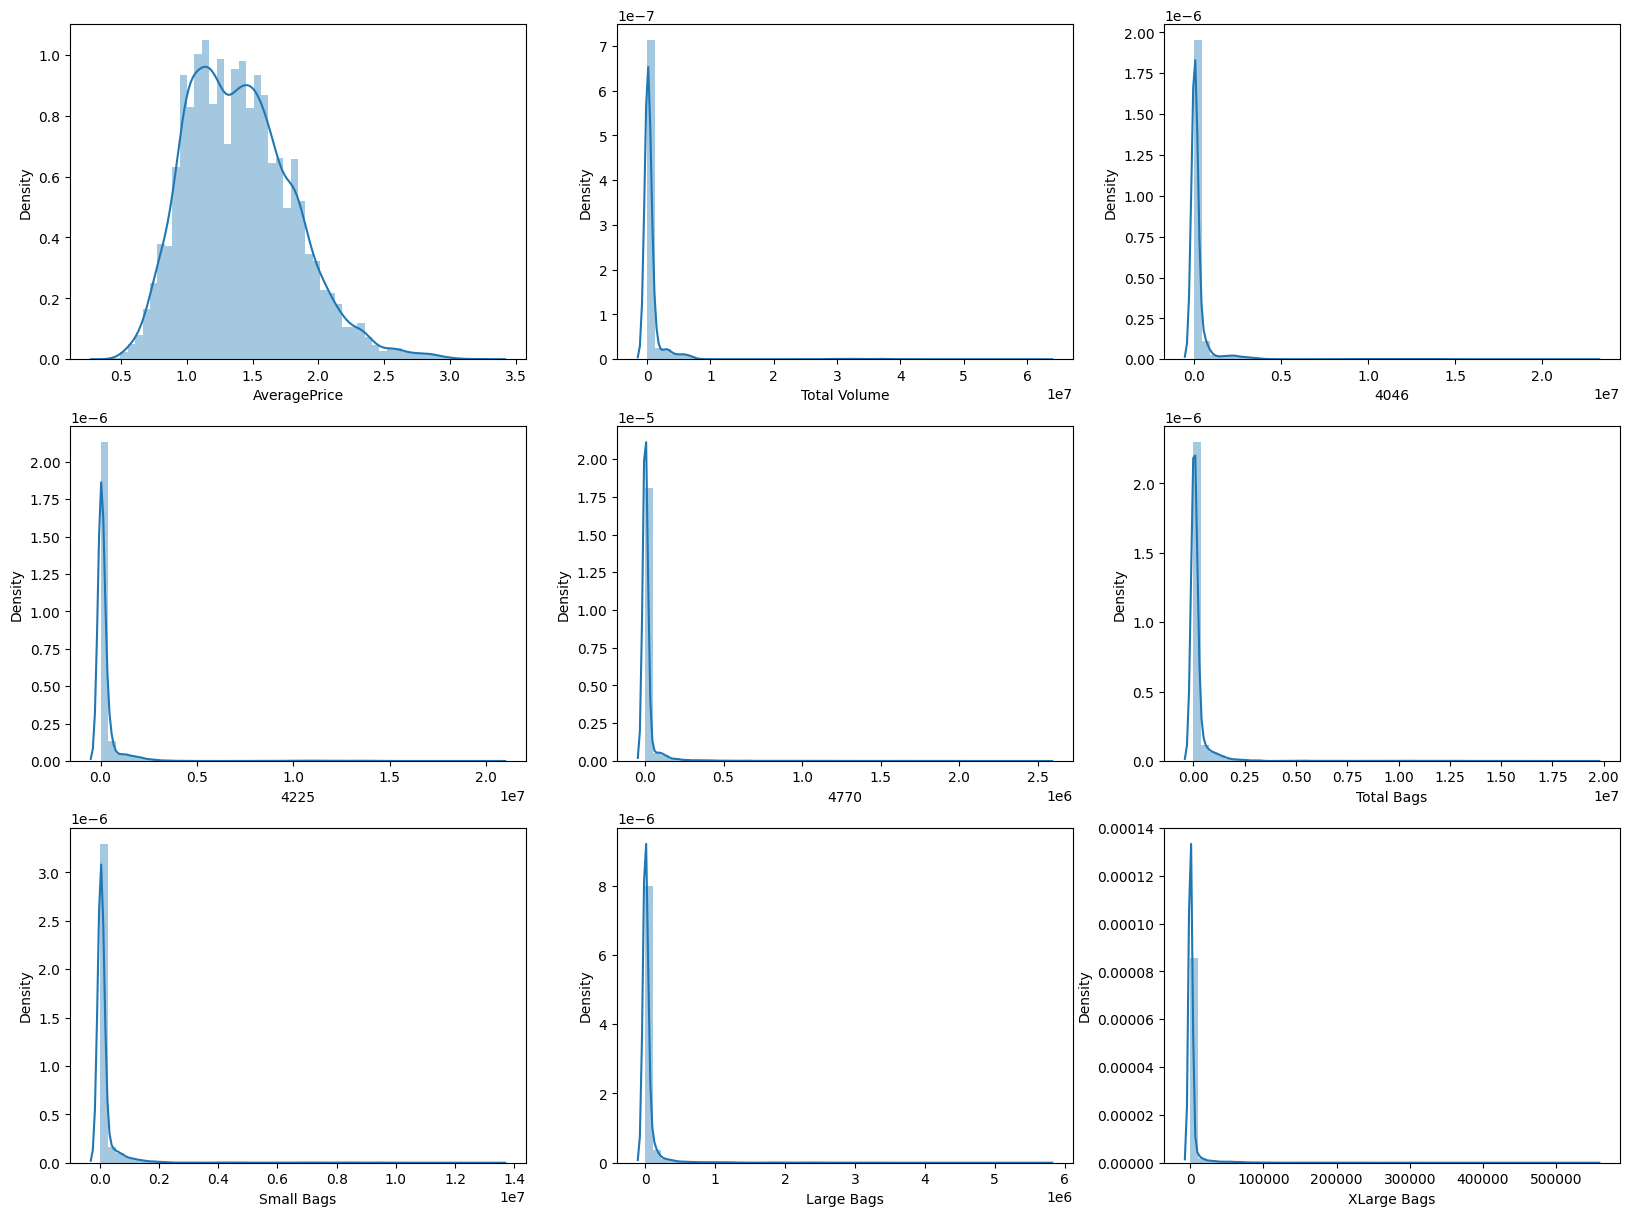

In [ ]:
#ploting distribution
plt.figure(figsize=(20,20))
plotno=1
for i in conti_f:
    plt.subplot(4,3,plotno)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotno+=1
plt.show()

all feature are highly right skewedl

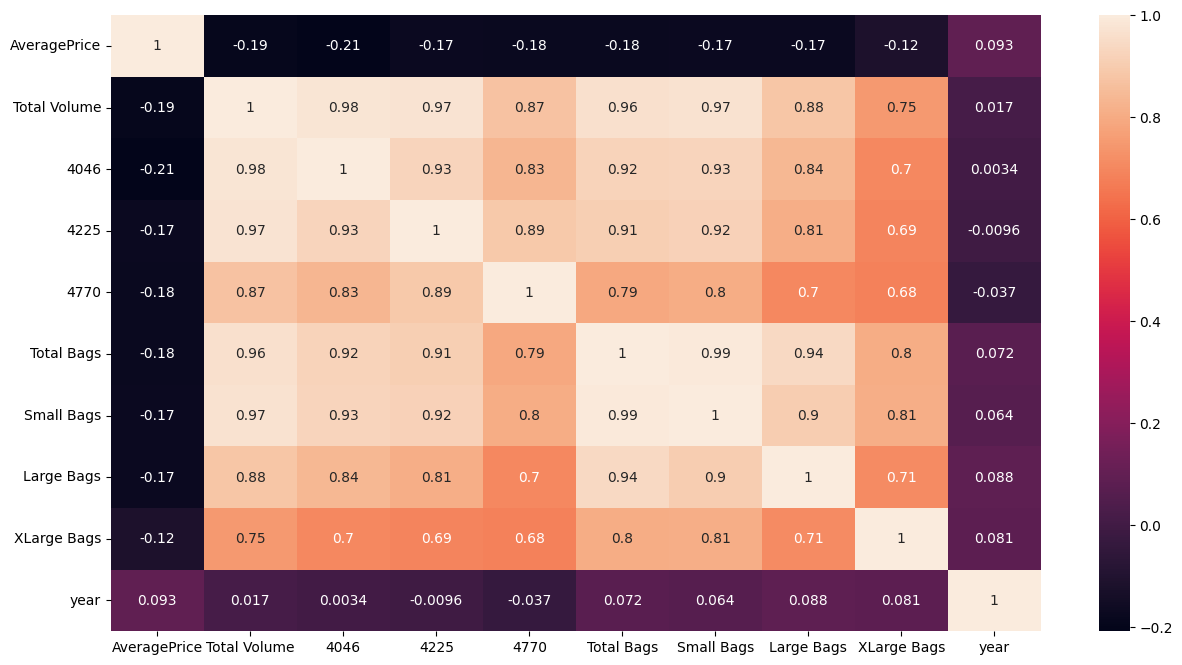

In [ ]:
#check correlation
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

There is multicollinearity in all continuos features

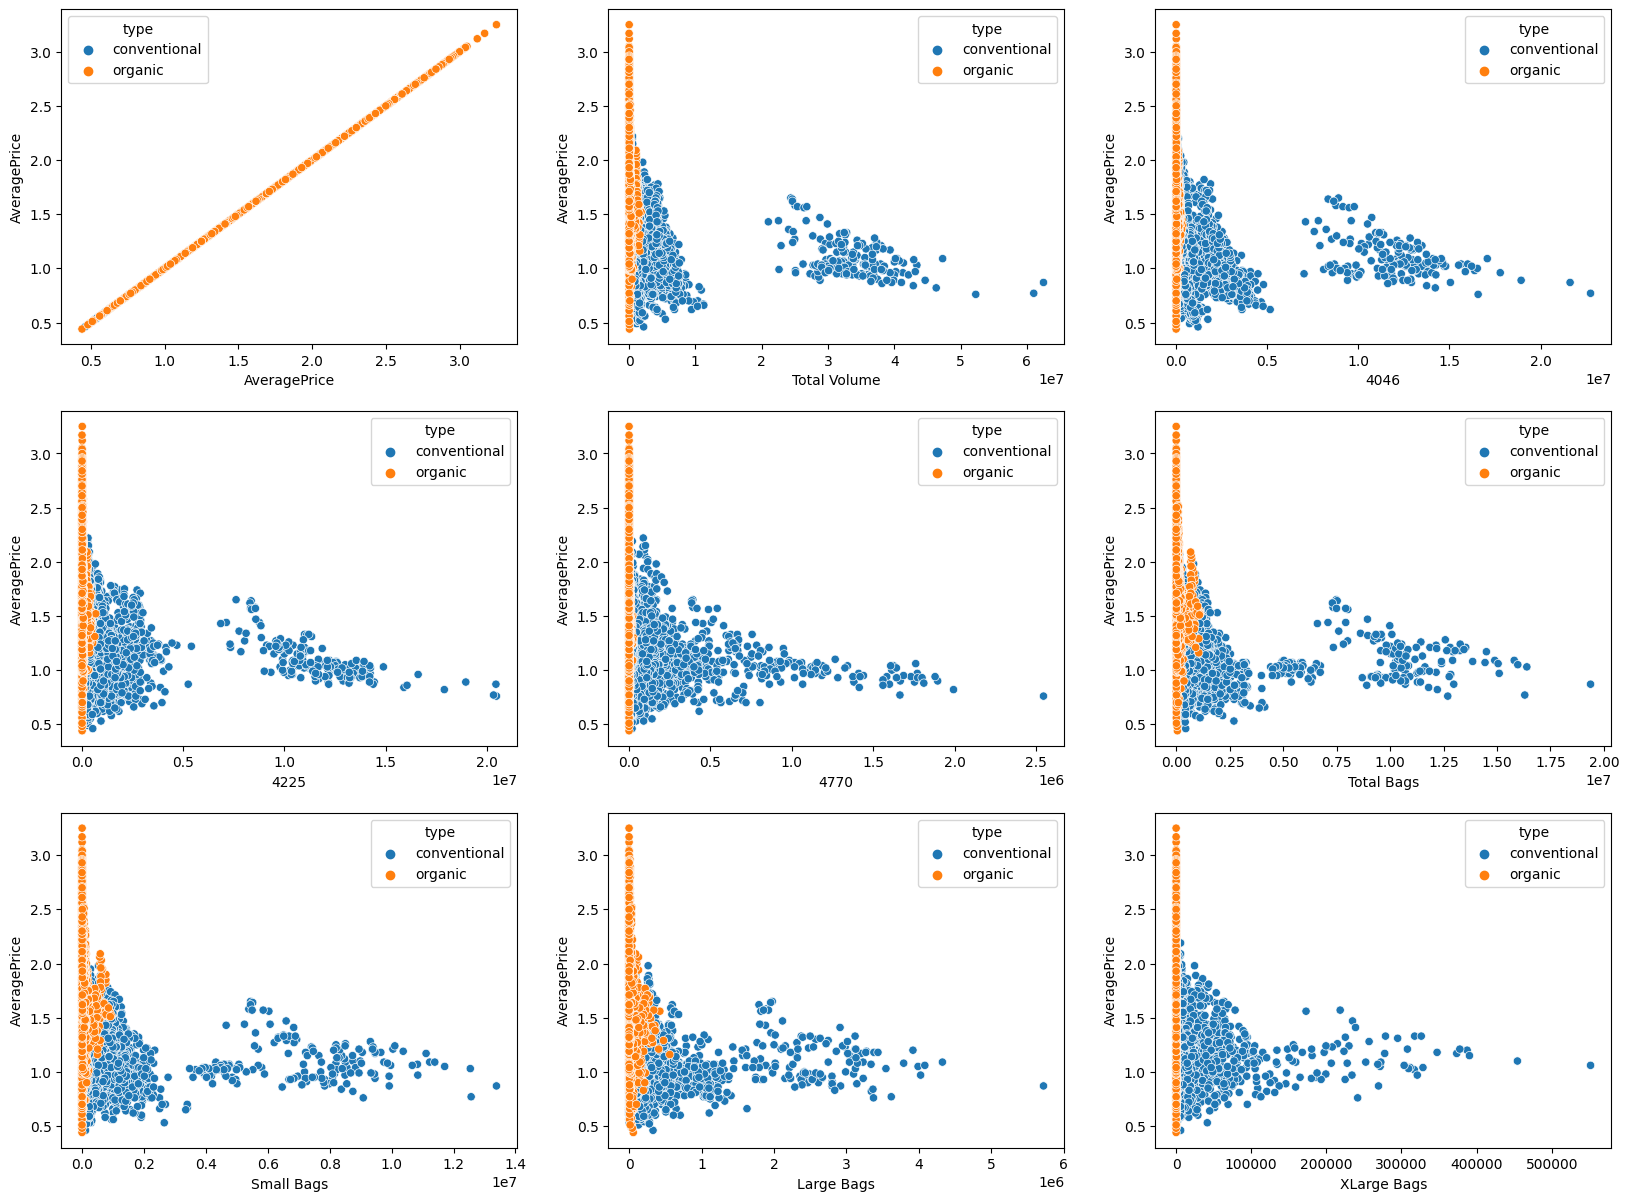

In [ ]:
plt.figure(figsize=(20,20))
plotno=1
for i in conti_f:
    plt.subplot(4,3,plotno)
    sns.scatterplot(x=df[i],y=df['AveragePrice'],hue=df['type'])
    plotno+=1
plt.show()

In [5]:
#Encoding Categorical values
for i in cat_f:
    df[i]=LabelEncoder().fit_transform(df[i])

NameError: ignored

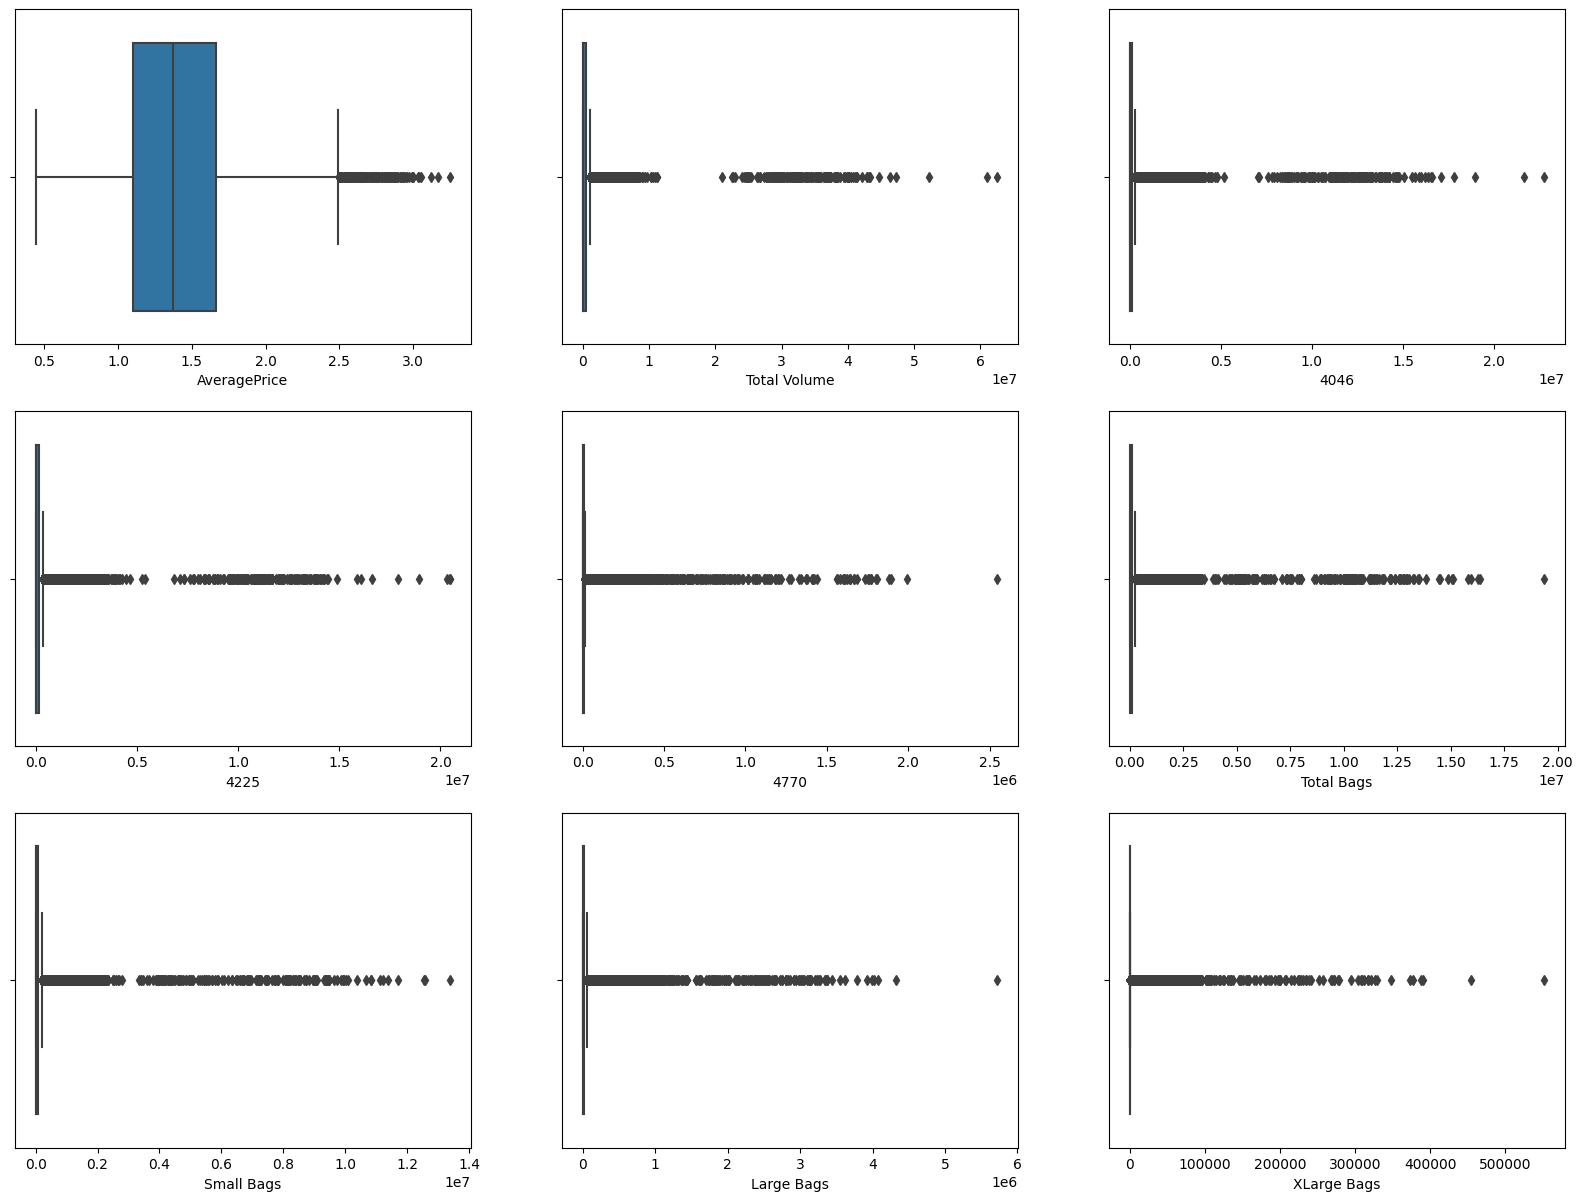

In [ ]:
#check Outliers
plt.figure(figsize=(20,20))
plotno=1
for i in conti_f:
    plt.subplot(4,3,plotno)
    sns.boxplot(data=df,x=df[i])
    plotno+=1
plt.show()

Too many outliers in data

In [ ]:
#check skewness
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [ ]:
#removing skewness
skew_f=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
pwt=PowerTransformer(method='yeo-johnson')
df[skew_f]=pwt.fit_transform(df[skew_f])

In [ ]:
# #removing outliers
# zscr=zscore(df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
# abszscr=np.abs(zscr)
# filter_entry=(abszscr < 3).all(axis=1)
# df=df[filter_entry]

In [ ]:
#spliting feature and label
X=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [ ]:
#check multicollinearity
vif=pd.DataFrame()
vif['Features']=X.columns
vif['score']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

,Features,score
0,Total Volume,46.202151
1,4046,7.165423
2,4225,10.866419
3,4770,3.903349
4,Total Bags,31.450099
5,Small Bags,15.491621
6,Large Bags,3.439185
7,XLarge Bags,2.117095
8,type,5.105661
9,year,2.649986


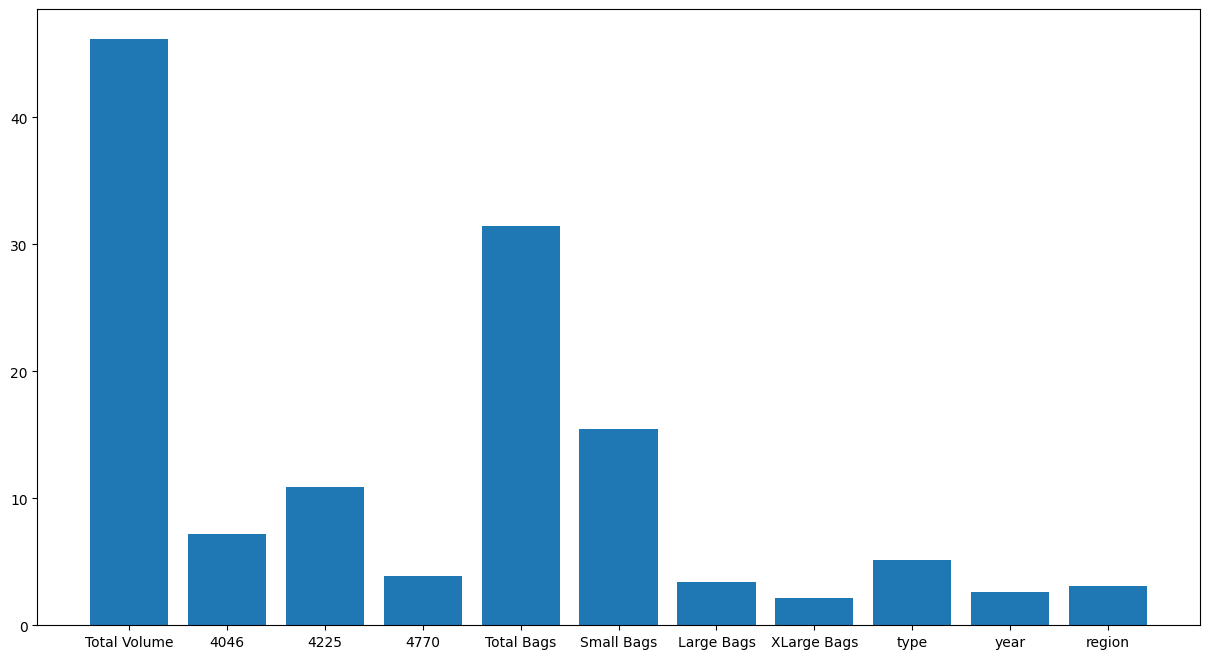

In [ ]:
#plot vif score of featuers
plt.figure(figsize=(15,8))
plt.bar(vif['Features'],vif['score'])
plt.show()

In [ ]:
#spliting feature and label for region prediction
XC=df.drop('region',axis=1)
yc=df['region']

In [ ]:
#check multicollinearity
vif_c=pd.DataFrame()
vif_c['Features']=XC.columns
vif_c['score']=[variance_inflation_factor(XC.values,i) for i in range(len(XC.columns))]
vif_c

,Features,score
0,AveragePrice,7.777698
1,Total Volume,46.635125
2,4046,6.878171
3,4225,10.992316
4,4770,4.178332
5,Total Bags,32.778321
6,Small Bags,15.546988
7,Large Bags,3.486737
8,XLarge Bags,2.146560
9,type,8.096015


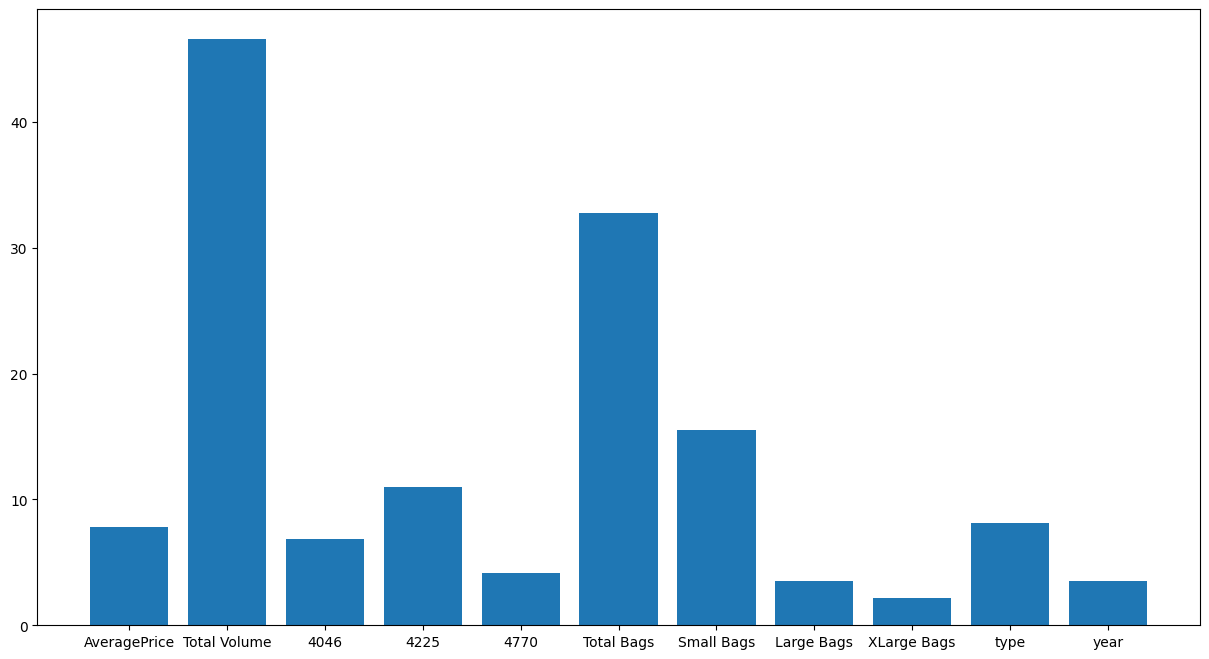

In [ ]:
#plot vif score of featuers
plt.figure(figsize=(15,8))
plt.bar(vif_c['Features'],vif_c['score'])
plt.show()

In [ ]:
#droping featuers which are have highest score
df.drop(columns=['Total Bags','Total Volume'],axis=1,inplace=True)

In [ ]:
#spliting feature and label
X=df.drop(columns=['AveragePrice',],axis=1)
y=df['AveragePrice']

In [ ]:
#scaling data
scal=StandardScaler()
x_scal=scal.fit_transform(X)

In [ ]:
#finding best random state
maxscr=0
ind=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_test_pred=lr.predict(x_test)
    scr=r2_score(y_test,y_test_pred)
    if scr > maxscr:
        maxscr=scr
        ind=i
print(f'maxscore {maxscr} at random state {ind}')

maxscore 0.5290008713525243 at random state 6


In [ ]:
#spliting data for training and testing
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.30,random_state=ind)

In [ ]:
def train_model(x_tr,x_te,y_tr,y_te,alg):
    alg.fit(x_tr,y_tr)
    print('-'*25,'Training Score','-'*25)
    y_pred_tr=alg.predict(x_tr)
    tr_scr=r2_score(y_tr,y_pred_tr)
    print(tr_scr*100)
    print('-'*25,'Testing Score','-'*25)
    y_pred_te=alg.predict(x_te)
    te_scr=r2_score(y_te,y_pred_te)
    print(te_scr*100)
    return alg

In [ ]:
#building linearregressor
lr=train_model(x_train,x_test,y_train,y_test,LinearRegression())

------------------------- Training Score -------------------------
50.55389462132216
------------------------- Testing Score -------------------------
52.90008713525243


In [ ]:
# Ridge Regulaization
ridge=train_model(x_train,x_test,y_train,y_test,Ridge())

------------------------- Training Score -------------------------
50.5538738494568
------------------------- Testing Score -------------------------
52.90051474365841


In [ ]:
#building kneighbors
kn=train_model(x_train,x_test,y_train,y_test,KNeighborsRegressor())

------------------------- Training Score -------------------------
87.55940980968705
------------------------- Testing Score -------------------------
81.60673010599298


In [ ]:
#building Decisiontreregressor
dt=train_model(x_train,x_test,y_train,y_test,DecisionTreeRegressor())

------------------------- Training Score -------------------------
100.0
------------------------- Testing Score -------------------------
71.0910467697839


In [ ]:
#building Randomforestregressor
rf=train_model(x_train,x_test,y_train,y_test,RandomForestRegressor())

------------------------- Training Score -------------------------
97.63699186223675
------------------------- Testing Score -------------------------
84.43520986330996


In [ ]:
#building AdaboostRegressor
adr=train_model(x_train,x_test,y_train,y_test,AdaBoostRegressor())

------------------------- Training Score -------------------------
46.84521535733109
------------------------- Testing Score -------------------------
49.81072251543045


In [ ]:
#building GradientBoostingRegressor
gbr=train_model(x_train,x_test,y_train,y_test,GradientBoostingRegressor())

------------------------- Training Score -------------------------
68.05046918810851
------------------------- Testing Score -------------------------
68.07511818840682


**Cross Validation**

In [ ]:
cross_val_score(LinearRegression(),x_scal,y).mean()*100

16.999370446796984

In [ ]:
cross_val_score(Ridge(alpha=2),x_scal,y).mean()*100

16.996991264024814

In [ ]:
cross_val_score(KNeighborsRegressor(),x_scal,y).mean()

0.09797542838678974

In [ ]:
cross_val_score(RandomForestRegressor(),x_scal,y).mean()*100

24.96848996417959

In [ ]:
cross_val_score(DecisionTreeRegressor(),x_scal,y).mean()*100

-35.31942589480684

In [ ]:
cross_val_score(AdaBoostRegressor(),x_scal,y).mean()*100

-6.851928822783041

In [ ]:
cross_val_score(GradientBoostingRegressor(),x_scal,y).mean()*100

35.660836309615746

**HyperParameter Tunning**

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
}

grid_search=GridSearchCV(GradientBoostingRegressor(),param_grid=param_grid,scoring='r2')
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_params_

tunning performed alerady it took much time. I restarted this thats why it show red mark as i stopped it

In [ ]:
#building GradientBoostingRegressor
gb=GradientBoostingRegressor(learning_rate=0.1,max_depth=9,n_estimators=300)
train_model(x_train,x_test,y_train,y_test,gb)

------------------------- Training Score -------------------------
98.88028901165326
------------------------- Testing Score -------------------------
85.39399204201847


GradientBoostingRegressor(max_depth=9, n_estimators=300)

**Model Saving**

In [ ]:
import pickle as pkl
pkl.dump(gb,open('avocado_price_pred.sav','wb'))

In [ ]:
model=pkl.load(open('avocado_price_pred.sav','rb'))

In [ ]:
cmpdf=pd.DataFrame()
cmpdf['y_test']=y_test
cmpdf['y_pred']=model.predict(x_test)
cmpdf

,y_test,y_pred
16532,1.38,1.690322
12483,1.39,1.275478
5078,0.82,0.826278
14696,2.01,1.936385
3501,1.01,1.102841
...,...,...
9853,1.70,1.468286
13566,1.84,1.690192
1972,1.16,1.166916
4932,1.09,1.223186


# Predict Region

In [ ]:
#spliting feature and label for predicting region
XC=df.drop('region',axis=1)
yc=df['region']

In [ ]:
#scaling data
scal_c=StandardScaler()
xc_scal=scal_c.fit_transform(XC)

In [ ]:
#finding best random state
maxscr_c=0
ind_c=0
for i in range(100):
    xc_train,xc_test,yc_train,yc_test=train_test_split(xc_scal,yc,test_size=0.30,random_state=i)
    knn_c=KNeighborsClassifier()
    knn_c.fit(xc_train,yc_train)
    yc_test_pred=knn_c.predict(xc_test)
    scr_c=accuracy_score(yc_test,yc_test_pred)
    if scr_c > maxscr_c:
        maxscr_c=scr_c
        ind_c=i
print(f'maxscore {maxscr_c} at random state {ind_c}')

maxscore 0.8215525114155251 at random state 51


In [ ]:
def train_model_c(x_tr,x_te,y_tr,y_te,alg):
    alg.fit(x_tr,y_tr)
    print('-'*25,'Training Score','-'*25)
    y_pred_tr=alg.predict(x_tr)
    tr_scr=accuracy_score(y_tr,y_pred_tr)
    print(tr_scr*100)
    print('-'*25,'Testing Score','-'*25)
    y_pred_te=alg.predict(x_te)
    te_scr=accuracy_score(y_te,y_pred_te)
    print(te_scr*100)
    print('Confusion Matrix')
    print(confusion_matrix(y_te,y_pred_te))
    return alg

In [ ]:
#spliting data for training and testing
xc_train,xc_test,yc_train,yc_test=train_test_split(xc_scal,yc,test_size=0.30,random_state=ind_c)

In [ ]:
#building linearregressor
lr_c=train_model_c(xc_train,xc_test,yc_train,yc_test,LogisticRegression())

------------------------- Training Score -------------------------
49.843431971191485
------------------------- Testing Score -------------------------
48.36529680365297
Confusion Matrix
[[ 57   0   0 ...   0   0   0]
 [  0  45   0 ...   0   0   0]
 [  0   0  47 ...   0   0   5]
 ...
 [  0   0   0 ... 111   0   0]
 [  0   0   0 ...   2  86   0]
 [  0   7   0 ...   0   0  11]]


In [ ]:
#building KNeighborsClassifier
kn_c=train_model_c(xc_train,xc_test,yc_train,yc_test,KNeighborsClassifier())

------------------------- Training Score -------------------------
88.52356348833568
------------------------- Testing Score -------------------------
82.15525114155251
Confusion Matrix
[[ 95   0   0 ...   0   0   0]
 [  0  72   0 ...   0   0   0]
 [  0   0  98 ...   0   0   0]
 ...
 [  0   0   0 ... 111   0   0]
 [  0   0   0 ...   0 100   0]
 [  0   1   1 ...   0   0  71]]


In [ ]:
#building DecisionTreeClassifier
dt_c=train_model_c(xc_train,xc_test,yc_train,yc_test,DecisionTreeClassifier())

------------------------- Training Score -------------------------
100.0
------------------------- Testing Score -------------------------
78.53881278538812
Confusion Matrix
[[ 76   0   0 ...   0   0   0]
 [  0  69   0 ...   0   0   0]
 [  0   0  90 ...   0   0   1]
 ...
 [  0   0   0 ... 111   0   0]
 [  0   0   0 ...   1  97   0]
 [  0   1   1 ...   0   0  73]]


In [ ]:
#building RandomForestClassifier
rfc_c=train_model_c(xc_train,xc_test,yc_train,yc_test,RandomForestClassifier())

------------------------- Training Score -------------------------
100.0
------------------------- Testing Score -------------------------
89.29680365296804
Confusion Matrix
[[ 96   0   0 ...   0   0   0]
 [  0  85   0 ...   0   0   0]
 [  0   0 102 ...   0   0   0]
 ...
 [  0   0   0 ... 111   0   0]
 [  0   0   0 ...   1 102   0]
 [  0   1   1 ...   0   0  79]]


In [ ]:
#building AdaBoostClassifier
adc_c=train_model_c(xc_train,xc_test,yc_train,yc_test,AdaBoostClassifier())

------------------------- Training Score -------------------------
8.478158759981213
------------------------- Testing Score -------------------------
8.036529680365296
Confusion Matrix
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 56]
 [ 0  0  0 ...  6  0  0]
 ...
 [ 0  0  0 ... 88  0  0]
 [ 0  0  0 ... 52  0  1]
 [ 0  0  0 ...  2  0 51]]


In [ ]:
#building GradientBoostingClassifier
gbc_c=train_model_c(xc_train,xc_test,yc_train,yc_test,GradientBoostingClassifier())

------------------------- Training Score -------------------------
97.54971034914671
------------------------- Testing Score -------------------------
81.35159817351598
Confusion Matrix
[[ 84   0   0 ...   0   0   0]
 [  0  71   0 ...   0   0   1]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ... 108   2   0]
 [  0   0   0 ...   1  99   0]
 [  0   2   2 ...   0   0  77]]


**Cross Validation**

In [ ]:
cvlr=(cross_val_score(LogisticRegression(),xc_scal,yc).mean())
print('cv mean: ',cvlr)
np.abs(cvlr - (accuracy_score(yc_test,lr_c.predict(xc_test))))

cv mean:  0.39766005323282416


15.138104265758678

In [ ]:
cvkn=(cross_val_score(KNeighborsClassifier(),xc_scal,yc).mean())
print('cv mean: ',cvkn)
np.abs(cvkn - (accuracy_score(yc_test,kn_c.predict(xc_test))))

cv mean:  0.5567905036846275


0.2936204552194821

In [ ]:
cvdt=(cross_val_score(DecisionTreeClassifier(),xc_scal,yc).mean())
print('cv mean: ',cvdt)
np.abs(cvdt - (accuracy_score(yc_test,dt_c.predict(xc_test))))

cv mean:  0.5523512315252443


0.2408907776071757

In [ ]:
cvrfc=(cross_val_score(RandomForestClassifier(),xc_scal,yc).mean())
print('cv mean: ',cvrfc)
np.abs(cvrfc - (accuracy_score(yc_test,rfc_c.predict(xc_test))))

cv mean:  0.678328249060542


0.2235895591586361

In [ ]:
cvadc=(cross_val_score(AdaBoostClassifier(),xc_scal,yc).mean())
print('cv mean: ',cvadc)
np.abs(cvadc - (accuracy_score(yc_test,adc_c.predict(xc_test))))

cv mean:  0.047563791168156414


0.031705615224537645

In [ ]:
cvgbc=(cross_val_score(GradientBoostingClassifier(),xc_scal,yc).mean())
print('cv mean: ',cvgbc)
np.abs(cvgbc - (accuracy_score(yc_test,gbc_c.predict(xc_test))))

cv mean:  0.6157479812446269


0.21822462149509914

**Hyperparameter Tunning**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(xc_train, yc_train)
best_params = grid_search.best_params_

In [ ]:
best_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
rf=RandomForestClassifier(max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=300)
rf=train_model_c(xc_train,xc_test,yc_train,yc_test,rf)

------------------------- Training Score -------------------------
100.0
------------------------- Testing Score -------------------------
90.59360730593608
Confusion Matrix
[[104   0   0 ...   0   0   0]
 [  0  86   0 ...   0   0   0]
 [  0   0  95 ...   0   0   0]
 ...
 [  0   0   0 ...  97   0   0]
 [  0   0   0 ...   1  93   0]
 [  0   0   0 ...   0   0  65]]


**Model Saving**

In [ ]:
pkl.dump(rf,open('avocado_region_pred.sav','wb'))

In [ ]:
rg_model=pkl.load(open('avocado_region_pred.sav','rb'))

In [ ]:
region_df=pd.DataFrame()
region_df['Org Region']=yc_test
region_df['pred region']=rg_model.predict(xc_test)
region_df

,Org Region,pred region
1474,28,28
7769,40,40
16710,37,37
5037,42,42
13609,32,32
...,...,...
6010,7,7
12133,3,3
6666,19,19
17643,3,3
